In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
TensorFlow version: 2.11.0
Eager execution: True
Copia local en el archivo dataset: /root/.keras/datasets/iris_training.csv
Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Label: species
OrderedDict([('sepal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([4.9, 6.2, 7. , 4.9, 5. , 4.9, 6.3, 6.4, 4.7, 7.2, 5.8, 5.4, 5.8,
       5.1, 4.6, 5.8, 4.6, 6. , 5.4, 7.2, 4.5, 6.9, 6.3, 5.8, 5.7, 5. ,
       7.7, 6.9, 5.5, 6.1, 6.4, 6.2], dtype=float32)>), ('sepal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([3.1, 3.4, 3.2, 3.1, 3.5, 3. , 2.7, 2.7, 3.2, 3. , 2.7, 3.4, 2.7,
       2.5, 3.1, 2.8, 3.6, 2.7, 3. , 3.2, 2.3, 3.1, 2.3, 4. , 2.9, 3.3,
       2.8, 3.2, 2.4, 3. , 3.2, 2.8], dtype=float32)>), ('petal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([1.5, 5.4, 4.7, 1.5, 1.6, 1.4, 4.9, 5.3, 1.6, 5.8, 4.1, 1.5, 5.1,
       3. , 1.5, 5.1, 1. , 5.1, 4.5, 6. ,

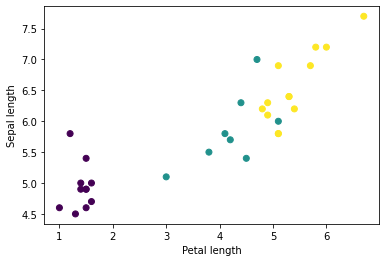

tf.Tensor(
[[5.5 2.4 3.7 1. ]
 [5.8 2.7 4.1 1. ]
 [5.  3.4 1.5 0.2]
 [5.2 3.5 1.5 0.2]
 [6.5 3.  5.5 1.8]], shape=(5, 4), dtype=float32)
tf.Tensor(
[[-0.21650635 -0.3996749  -0.22596033]
 [-0.26085544 -0.46666354 -0.2613194 ]
 [-0.332017   -0.5251797  -0.2843185 ]
 [-0.3374945  -0.5346645  -0.28941858]
 [-0.04299071 -0.510157   -0.36658776]], shape=(5, 3), dtype=float32)
Prediction: [0 0 2 2 0 0 0 0 2 2 0 0 2 2 2 2 0 2 0 0 0 0 0 0 2 0 2 2 2 2 2 2]
    Labels: [1 1 0 0 2 1 1 2 0 1 1 2 0 0 0 0 2 0 2 2 2 1 2 1 0 2 0 0 1 1 1 0]
Loss test: 1.1665078401565552
Step: 0, Initial Loss: 1.1665078401565552
Step: 1,         Loss: 1.1411645412445068
Epoch 000: Loss: 1.124, Accuracy: 25.833%
Epoch 050: Loss: 0.095, Accuracy: 98.333%
Epoch 100: Loss: 0.058, Accuracy: 98.333%
Epoch 150: Loss: 0.065, Accuracy: 96.667%
Epoch 200: Loss: 0.043, Accuracy: 99.167%


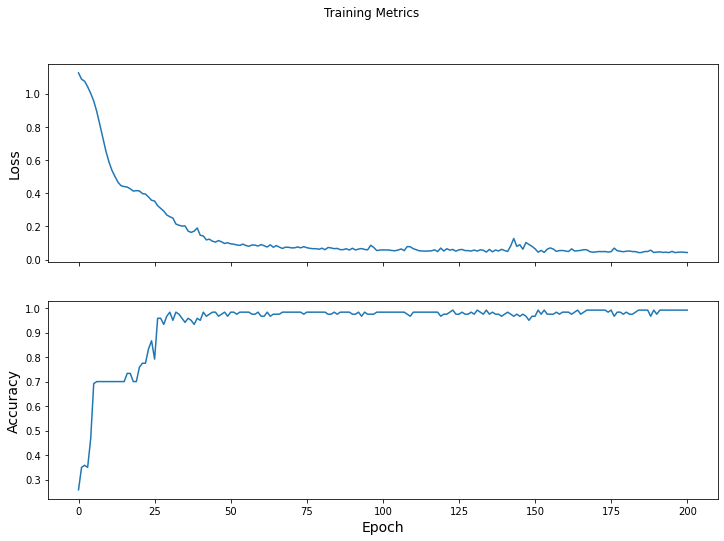

Test set accuracy: 96.667%
Example 0 prediction: Iris setosa (99.8%)
Example 1 prediction: Iris versicolor (99.9%)
Example 2 prediction: Iris virginica (99.4%)


In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

from __future__ import absolute_import, division, print_function, unicode_literals
import functools

import tensorflow as tf
import matplotlib.pyplot as plt
import os
import pathlib

print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))

# Importamos y "parseamos" el dataset de entrenamiento

train_dataset_url = pathlib.Path('/content/drive/MyDrive/1678463966iris_training.csv')

train_dataset_fp = tf.keras.utils.get_file("iris_training.csv", origin=train_dataset_url)

print("Copia local en el archivo dataset: {}".format(train_dataset_fp))

# Ordenar columnas en el archivo CSV
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

feature_names = column_names[:-1]
label_name = column_names[-1]

print("Features: {}".format(feature_names))
print("Label: {}".format(label_name))

"""
Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'] 
Label: species
"""

class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']

# Crear un tf.data.Dataset
batch_size = 32

train_dataset = tf.data.experimental.make_csv_dataset(
  train_dataset_fp,
  batch_size,
  column_names=column_names,
  label_name=label_name,
  num_epochs=1)

features, labels = next(iter(train_dataset))

print(features)

#Aquí podemos empezar a ver varios clusters trazando algunas características del batch:
plt.scatter(features['petal_length'],
            features['sepal_length'],
            c=labels,
            cmap='viridis')

plt.xlabel("Petal length")
plt.ylabel("Sepal length")
plt.show()


# Esta función usa el método tf.stack que toma los valores de una lista de tensors
# Y crea un tensor combinado con dimensiones específicas
def pack_features_vector(features, labels):
  """Pack the features into a single array."""
  features = tf.stack(list(features.values()), axis=1)
  return features, labels


# Usaremos el método tf.data.Dataset.map para empaquetar las características de cada
# (features,label) pair into the training dataset:
train_dataset = train_dataset.map(pack_features_vector)


features, labels = next(iter(train_dataset))

print(features[:5])

# Crear un modelo usando Keras
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,)),  # input shape required
  tf.keras.layers.Dense(10, activation=tf.nn.relu),
  tf.keras.layers.Dense(3)
])

# Usando el modelo
predictions = model(features)

print(predictions[:5])

tf.nn.softmax(predictions[:5])

print("Prediction: {}".format(tf.argmax(predictions, axis=1)))
print("    Labels: {}".format(labels))

"""
Prediction: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
    Labels: [1 2 0 0 1 2 2 0 0 2 0 2 1 1 1 0 0 0 2 1 2 0 0 1 1 2 1 1 0 2 2 0]
"""

# Entrenando el modelo
# Define la perdida y el gradiente de la función
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)


def loss(model, x, y):
  y_ = model(x)

  return loss_object(y_true=y, y_pred=y_)


l = loss(model, features, labels)
print("Loss test: {}".format(l))

"""
Loss test: 2.3108744621276855
"""


# Usar el tf.GradientTape context para calcular los gradientes usados para optimizar
# nuestro modelo
def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss(model, inputs, targets)
  return loss_value, tape.gradient(loss_value, model.trainable_variables)


# Creando un optimizador
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

# Usaremos esto para calcular un solo paso de optimización 
loss_value, grads = grad(model, features, labels)

print("Step: {}, Initial Loss: {}".format(optimizer.iterations.numpy(),
                                          loss_value.numpy()))

optimizer.apply_gradients(zip(grads, model.trainable_variables))

print("Step: {},         Loss: {}".format(optimizer.iterations.numpy(),
                                          loss(model, features, labels).numpy()))

"""
Step: 0, Initial Loss: 2.3108744621276855
Step: 1,         Loss: 1.7618987560272217
"""

# Bucle de entrenamiento
# Si re-ejecutamos esta celda, se recomienda usar las mismas variables del modelo
# Mantener los resultados para trazar
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
  epoch_loss_avg = tf.keras.metrics.Mean()
  epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

  # Bucle de entrenamiento, usando batches de 32
  for x, y in train_dataset:
    # Optimizamos el modelo
    loss_value, grads = grad(model, x, y)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # Sigue el proceso
    epoch_loss_avg(loss_value)  
    # Comparar el label predefinido con el label actual
    epoch_accuracy(y, model(x))

  # fin
  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())

  if epoch % 50 == 0:
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

"""
Epoch 000: Loss: 1.568, Accuracy: 30.000%
Epoch 050: Loss: 0.061, Accuracy: 98.333%
Epoch 100: Loss: 0.058, Accuracy: 97.500%
Epoch 150: Loss: 0.044, Accuracy: 99.167%
Epoch 200: Loss: 0.049, Accuracy: 97.500%
"""

# Visualizamos la función de pérdida a lo largo del tiempo
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

# Configuramos el dataset de prueba

test_url = pathlib.Path('/content/drive/MyDrive/1678463978iris_test.csv')

test_fp = tf.keras.utils.get_file("iris_test.csv", origin=test_url)

test_dataset = tf.data.experimental.make_csv_dataset(
  test_fp,
  batch_size,
  column_names=column_names,
  label_name='species',
  num_epochs=1,
  shuffle=False)

test_dataset = test_dataset.map(pack_features_vector)

# Evaluamos el modelo de prueba del dataset
test_accuracy = tf.keras.metrics.Accuracy()

for (x, y) in test_dataset:
  logits = model(x)
  prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
  test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

# Podemos ver el último batch, por ejemplo, el modelo es generalmente correcto
tf.stack([y, prediction], axis=1)

# Usaremos el modelo entrenado para hacer predicciones
predict_dataset = tf.convert_to_tensor([
  [5.1, 3.3, 1.7, 0.5, ],
  [5.9, 3.0, 4.2, 1.5, ],
  [6.9, 3.1, 5.4, 2.1]
])

predictions = model(predict_dataset)

for i, logits in enumerate(predictions):
  class_idx = tf.argmax(logits).numpy()
  p = tf.nn.softmax(logits)[class_idx]
  name = class_names[class_idx]
  print(f"Example {i} prediction: {name} ({100 * p:4.1f}%)")